# Notebook para testes
Aqui testo as funções.

In [1]:
import myfunctions as my

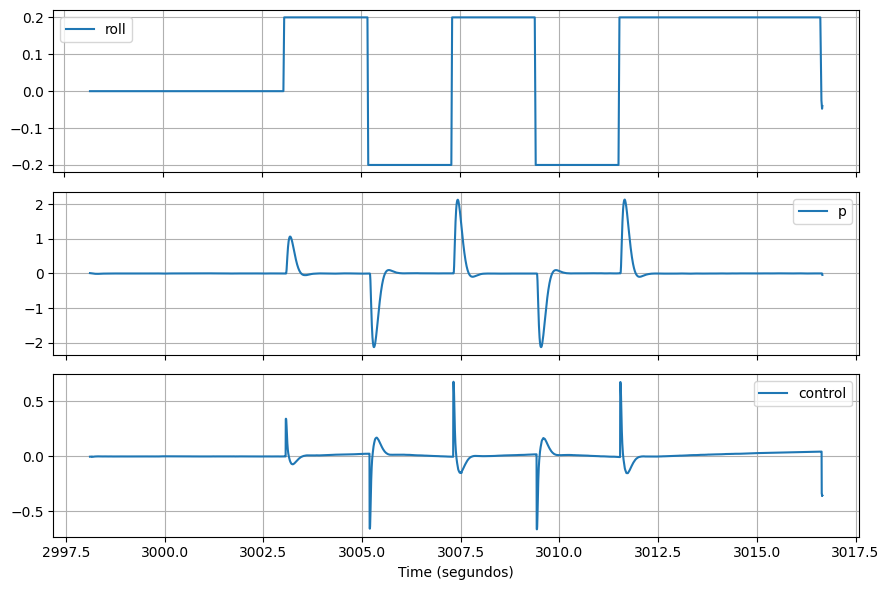

In [2]:
file_path = 'ulogs/log_30_2024-9-17-10-32-27.ulg'
t_roll, roll, t_p, p, t_cont, cont = my.get_euler_taxa(file_path = file_path, angle='roll', taxa='p', sinal=[-1,1,1,-1])

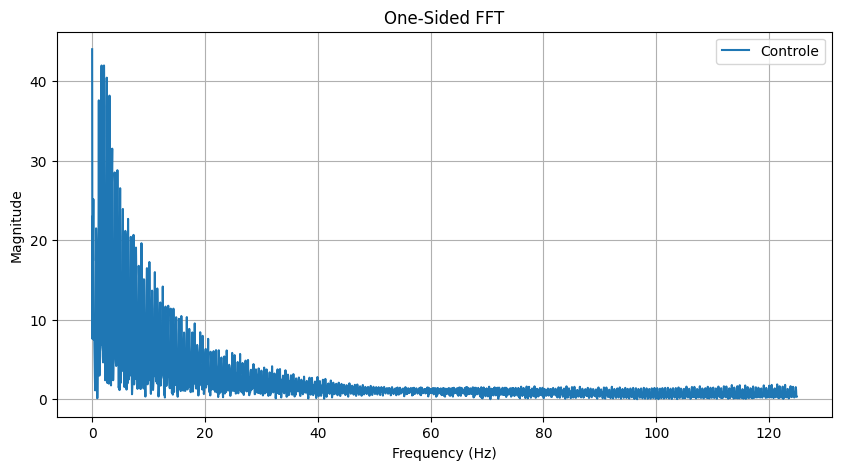

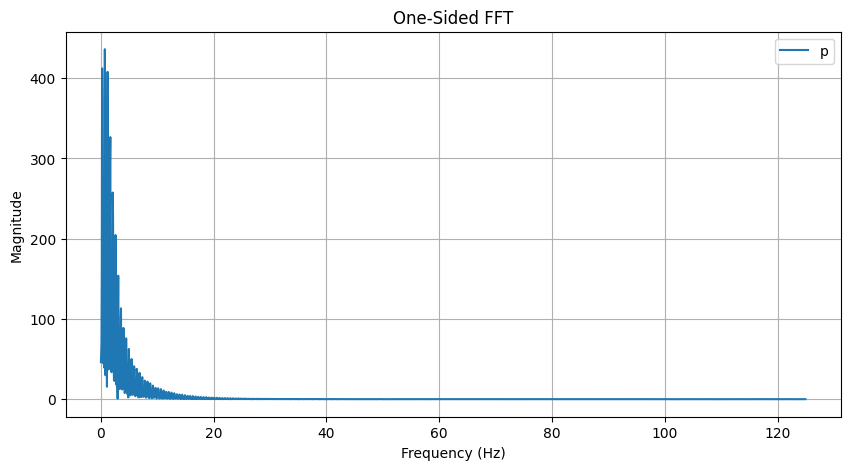

In [6]:
freqs_c, fft_c_amp = my.fft_one_sided(t_cont, cont, plot=True, label='Controle')
freqs_p, fft_p_amp = my.fft_one_sided(t_p, p, plot=True, label='p')

In [7]:
fft_c_amp

array([43.982307  -1.5543122e-15j,  3.744748  +6.6081367e+00j,
       12.530867  +1.9330654e+01j, ...,  0.64557207+1.0216031e+00j,
        0.30649188-4.5823317e-02j,  0.22139175-2.4439086e-01j],
      dtype=complex64)